The data collection is constracted from two parts. The first one is collecting venue ids and the second one is using the ids to collect the details of each venue. The collection of the venue ids is done through the https://api.foursquare.com/v2/venues/search endpoint. The endpoint has a maximum limit of 50 return results however, it does not have an offset parameter. To resolve this I am using the following two parameters:

ll - Latitude and longitude of the location

categoryId - A comma separated list of categories to limit results to

Created a csv file from the latitude-longtiude of all the cities in California:
https://www.w3.org/2003/01/geo/test/ustowns/latlong.htm

In [3]:
# Sample of the lat_long cssv file
import pandas as pd
lat_long = pd.read_csv('lat_long.csv')
lat_long.head(5)

,lat_long
0,"34.582769,-117.409214"
1,"34.153339,-118.761675"
2,"37.765206,-122.241636"
3,"37.886869,-122.297747"
4,"34.095286,-118.127014"


I used the following endpoint to collect all category ids:
https://api.foursquare.com/v2/venues/categories
The return has parent and sub categories.
Created a csv file from the subcategories only since the parent categories will return duplicates.

In [4]:
# Sample of the category csv file
import pandas as pd
category = pd.read_csv('categories.csv')
category.head(5)

,category
0,56aa371be4b08b9a8d5734db
1,4fceea171983d5d06c3e9823
2,4bf58dd8d48988d1e1931735
3,4bf58dd8d48988d1e2931735
4,4bf58dd8d48988d1e4931735


I send a request to the https://api.foursquare.com/v2/venues/search endpoint for each category and each lat_long for that category. I save the results with a datetime stamp for each obtained venue id in a csv file. This file contains duplicate venue id values since one venue can belong to more than one category.

The API has the following limits:
- 99 500 regular calls in a period of 24 hours (the endpoint returning the venue's id it is considered as a regular call)
- 500 Premium calls in a period of 24 hours (the endpoint returning the venue's details it is considered as a premium call)
- 5 000 requestes per hour

The script runs every 60 minutes so I can avoid iterating over the categories without getting venue ids in the responses because of the hourly limit.

In [1]:
# Total venue ids collected by now
import pandas as pd
total_venue_ids = pd.read_csv('files/id_data.csv')
len(total_venue_ids['venue_id'])

1165137

In [2]:
# Total unique venue ids collected by now
import pandas as pd
total_venue_ids = pd.read_csv('files/id_data.csv')
len(total_venue_ids['venue_id'].unique())

89539

Once the iteration of the categories completes I will start sending requestes to the following endpoint:
https://api.foursquare.com/v2/venues/VENUE_I

The responnse data is in JSON format. I will extract the necessary values and write them in to a SQL database constructed by the Entity-Relationship diagram below.

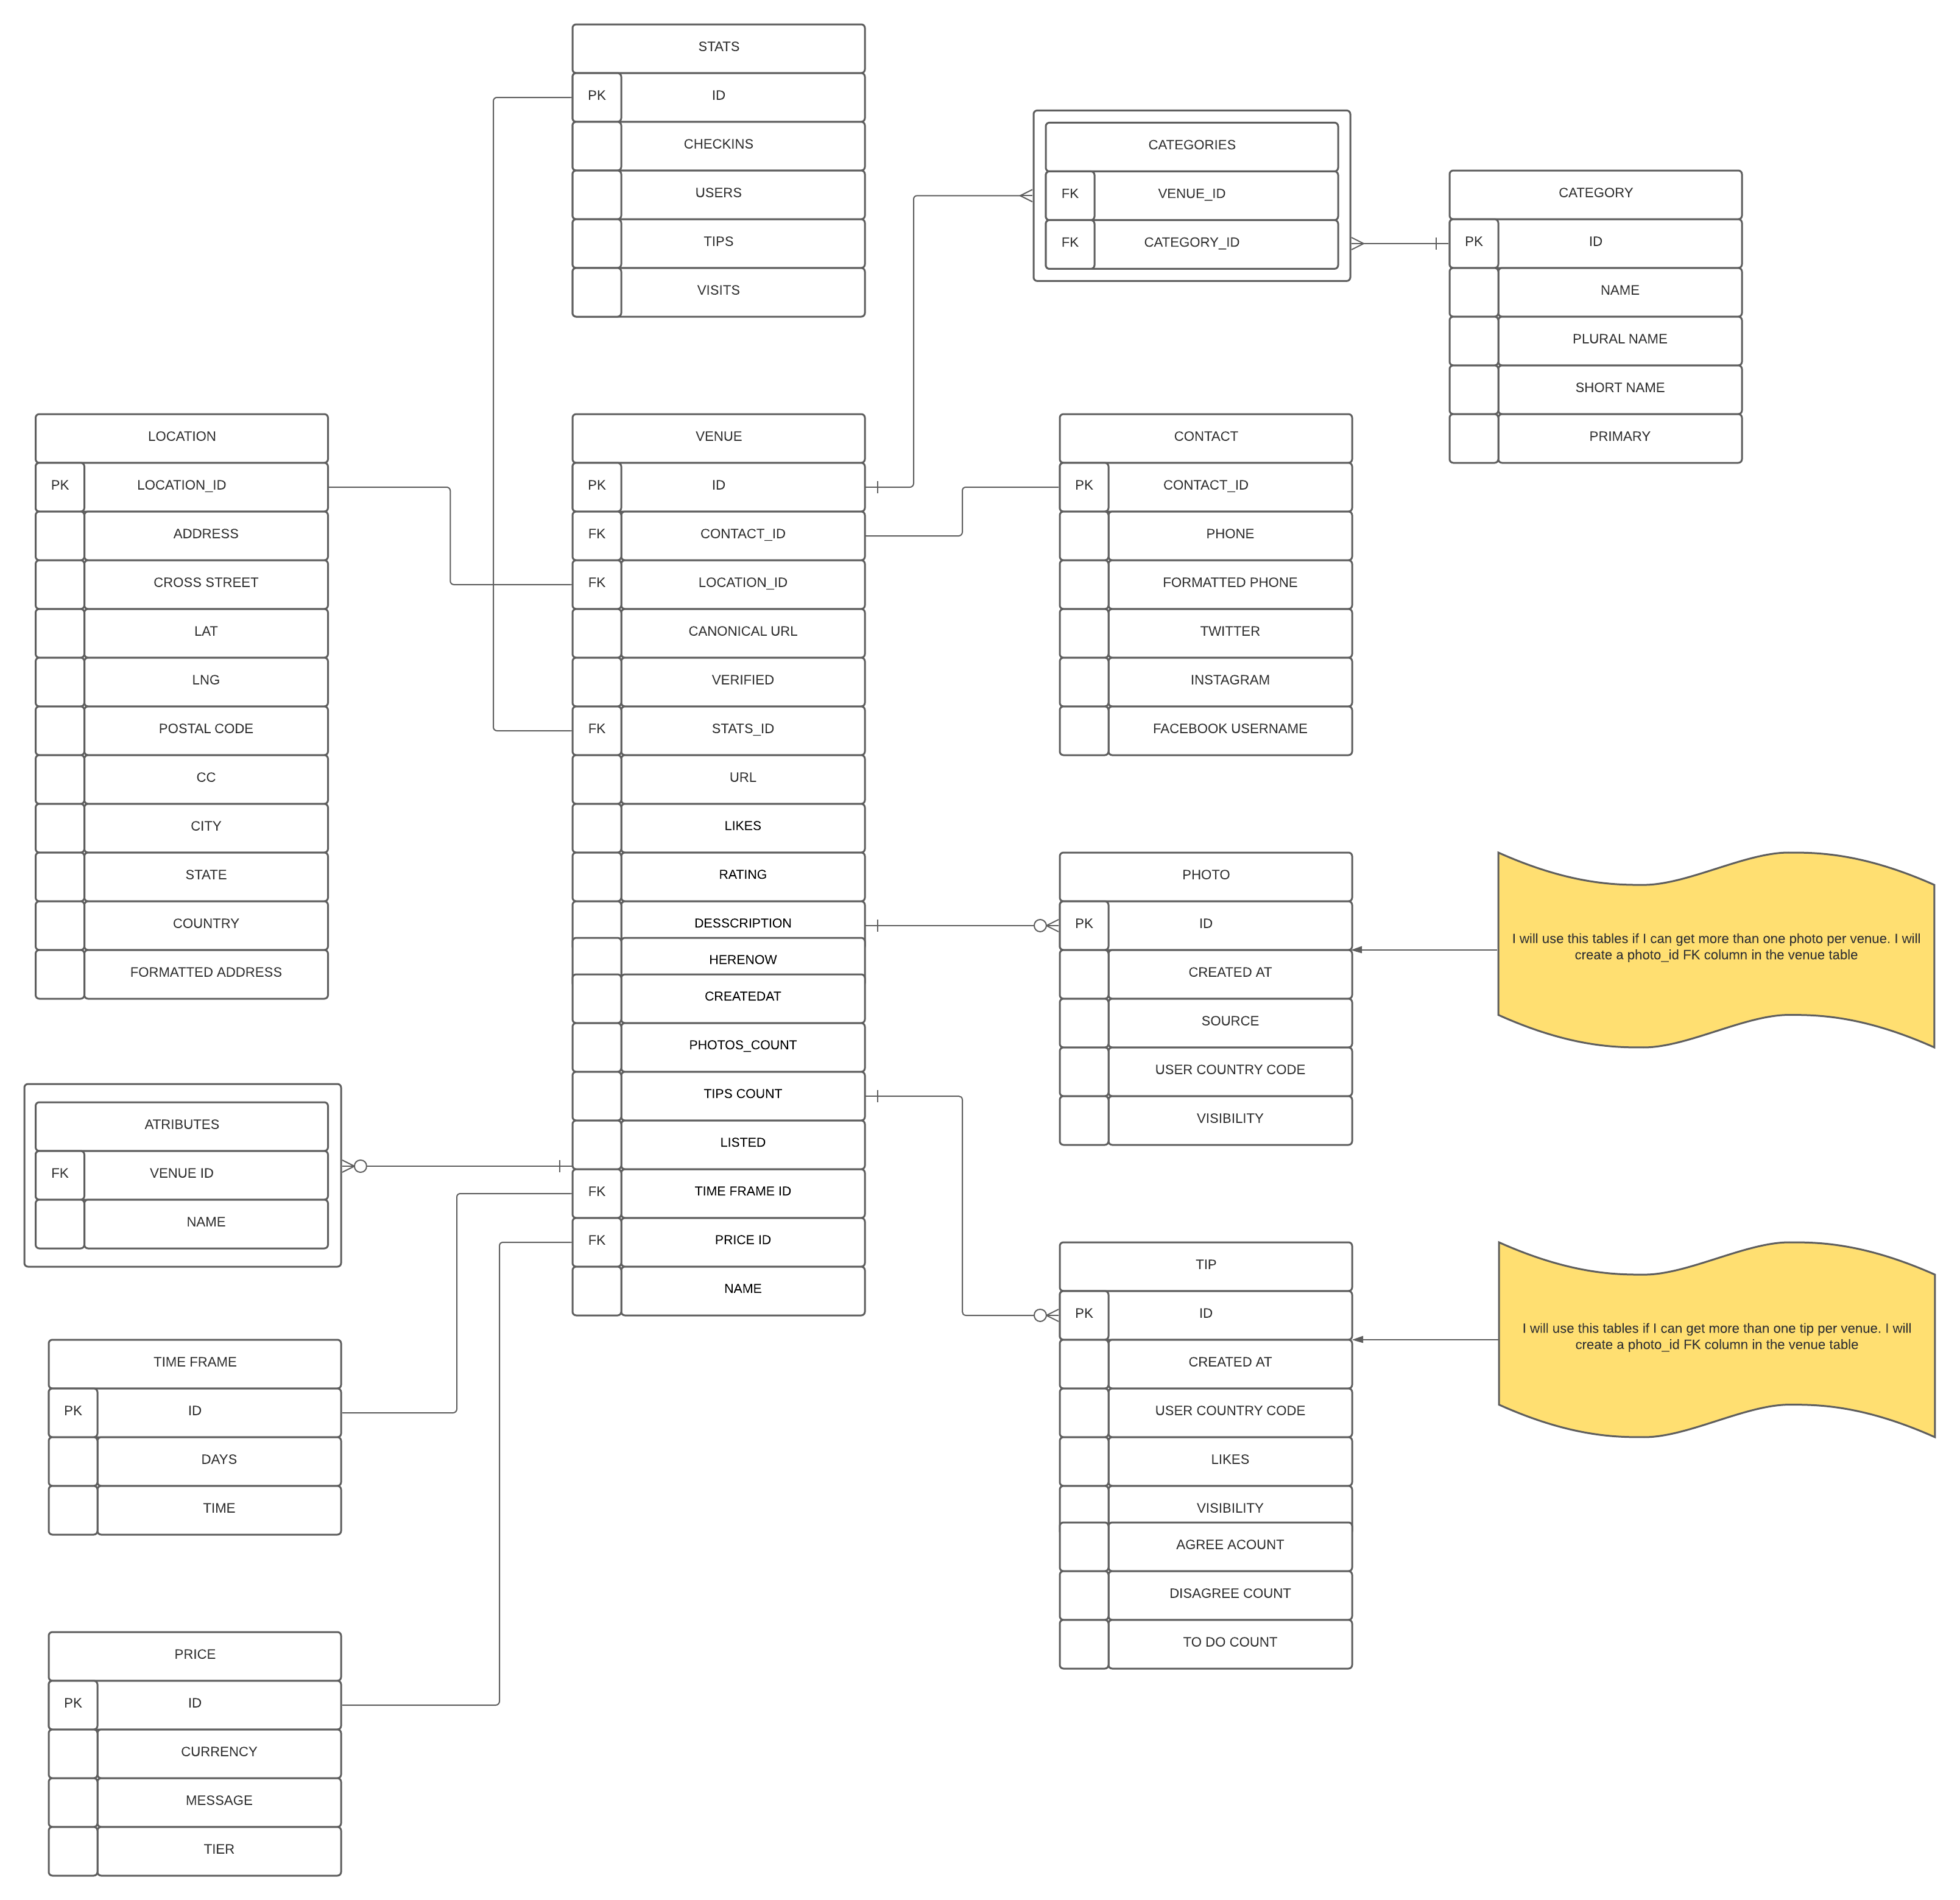

In [3]:
from IPython.display import Image
Image("files/Springboard.png")

The path to the script that creates the database and all of its tables:

files/create_tables.sql

# Filtering the data from the venue details

The following fields are not returned for all venues in the response:

### **url**

### **description**

### **hours**

### **price**

### **rating**
